Use these filenames to change the dataset for data
    # [this is smallest] articles-training-byarticle-20181122.xml - 3mb
    # articles-validation-bypublisher-20181122.xml - 894mb
    # articles-training-bypublisher-20181122.xml - 3gb
Use these filenames to change the dataset for truth
    # [this is smallest] ground-truth-training-byarticle-20181122.xml - 109kb
    # ground-truth-validation-bypublisher-20181122.xml - 24mb
    # ground-truth-training-bypublisher-20181122.xml - 100mb

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
folder = '/content/drive/My Drive/ire-major-project/' # use in python code

In [3]:
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
def show_perf_metrics(y_actual, y_pred):
    print("f1 score: ", f1_score(y_actual, y_pred, average=None) *100)
    print('accuracy: ', accuracy_score(y_actual, y_pred) *100)
    print('precision: ', precision_score(y_actual, y_pred, average=None) *100)
    print('recall: ', recall_score(y_actual, y_pred, average=None) *100)
    ax= plt.subplot()
    cm = confusion_matrix(y_true=y_actual, y_pred=y_pred)
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

# Load the Training and Testing data

In [5]:
df_data = pd.read_csv(folder+'data_training_bypublisher.csv')
df_truth = pd.read_csv(folder+'ground_truth_training_bypublisher.csv')
df_data.info(memory_usage='deep')
df_truth.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    600000 non-null  int64 
 1   id            600000 non-null  int64 
 2   date          496166 non-null  object
 3   title         598220 non-null  object
 4   article_text  600000 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.6 GB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     600000 non-null  int64 
 1   id             600000 non-null  int64 
 2   hyperpartisan  600000 non-null  bool  
 3   bias           600000 non-null  object
dtypes: bool(1), int64(2), object(1)
memory usage: 45.7 MB


In [6]:
print(len(df_truth[df_truth.hyperpartisan==True]), len(df_truth[df_truth.hyperpartisan==False]))

300000 300000


In [7]:
df_data_test = pd.read_csv(folder+'data_validation_bypublisher.csv')
df_truth_test = pd.read_csv(folder+'ground_truth_validation_bypublisher.csv')
df_data_test.info(memory_usage='deep')
df_truth_test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    150000 non-null  int64 
 1   id            150000 non-null  int64 
 2   date          100492 non-null  object
 3   title         137621 non-null  object
 4   article_text  150000 non-null  object
dtypes: int64(2), object(3)
memory usage: 538.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     150000 non-null  int64 
 1   id             150000 non-null  int64 
 2   hyperpartisan  150000 non-null  bool  
 3   bias           150000 non-null  object
dtypes: bool(1), int64(2), object(1)
memory usage: 11.5 MB


In [8]:
print(len(df_truth_test[df_truth_test.hyperpartisan==True]), len(df_truth_test[df_truth_test.hyperpartisan==False]))

75000 75000


# Preprocessing

In [9]:
X = df_data.article_text.values
y = df_truth.hyperpartisan.values
y2 = df_truth.bias.values

tfidfVectorizer = TfidfVectorizer()
tfidfVectorizer.fit(X)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

Preparing training and validation set

In [10]:
X_tfidf = tfidfVectorizer.transform(X)
X_tfidf_train, X_tfidf_validate, y_train, y_validate = train_test_split(X_tfidf, y, test_size = 0.2, random_state=1234)

In [11]:
X_tfidf_train2, X_tfidf_validate2, y_train2, y_validate2 = train_test_split(X_tfidf, y2, test_size = 0.2, random_state=1234)

Preparing test set

In [12]:
X_test = df_data_test.article_text.values
y_test = df_truth_test.hyperpartisan.values
y_test2 = df_truth_test.bias.values
X_test_tfidf = tfidfVectorizer.transform(X_test)

# Multinomial Naive Bayes

## For Hyperpartisan

### Training the model

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nbmodel = MultinomialNB()
nbmodel.fit(X_tfidf_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Performance on Train and validation set

f1 score:  [81.40729875 83.5987923 ]
accuracy:  82.57166666666666
precision:  [87.21255268 78.96224144]
recall:  [76.32665819 88.8138135 ]


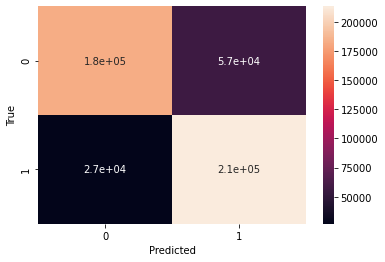

In [ ]:
y_pred = nbmodel.predict(X_tfidf_train)
show_perf_metrics(y_train, y_pred)

f1 score:  [80.32480254 82.55014034]
accuracy:  81.50416666666666
precision:  [85.88489536 78.06774923]
recall:  [75.44084589 87.57861373]


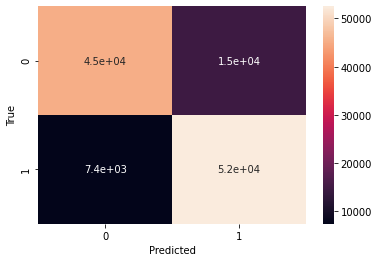

In [ ]:
y_pred = nbmodel.predict(X_tfidf_validate)
show_perf_metrics(y_validate, y_pred)

### Testing

(150000,) (150000,)
f1 score:  [40.18715979 66.70056872]
accuracy:  57.218666666666664
precision:  [66.76783944 54.59936115]
recall:  [28.744      85.69333333]


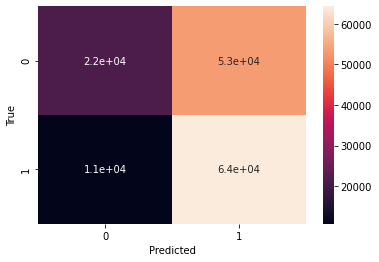

In [ ]:
y_test_pred = nbmodel.predict(X_test_tfidf)
print(y_test_pred.shape, y_test.shape)
show_perf_metrics(y_test, y_test_pred)

## For Bias

### Training the Model

In [ ]:
nbmodel = MultinomialNB()
nbmodel.fit(X_tfidf_train2, y_train2)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Performance on Train and validation set

f1 score:  [72.19293089 67.20311568 11.94893845 67.41661034  6.37479289]
accuracy:  63.27854166666667
precision:  [65.63956102 54.00095904 99.13936702 76.33254157 99.91197183]
recall:  [80.19999598 88.94949075  6.35759939 60.3656704   3.29243176]


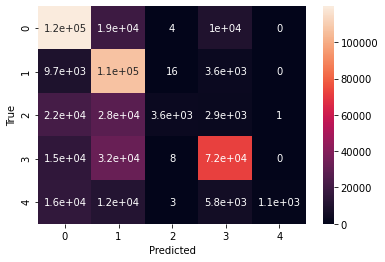

In [ ]:
y_pred = nbmodel.predict(X_tfidf_train2)
show_perf_metrics(y_train2, y_pred)

f1 score:  [71.51987789 65.93926214 10.94100837 66.79828646  6.83839667]
accuracy:  62.58166666666667
precision:  [65.12127858 52.82059592 98.89298893 76.4039199  99.66329966]
recall:  [79.31289836 87.7275021   5.79083838 59.33818663  3.54066986]


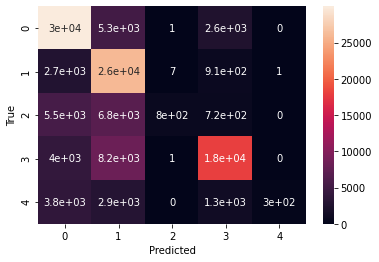

In [ ]:
y_pred = nbmodel.predict(X_tfidf_validate2)
show_perf_metrics(y_validate2, y_pred)

### Testing

f1 score:  [31.77204499 43.05605714  0.         12.967926    0.        ]
accuracy:  30.60733333333333


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision:  [36.72707341 28.73440094  0.         34.21532847  0.        ]
recall:  [27.99509087 85.84        0.          8.          0.        ]


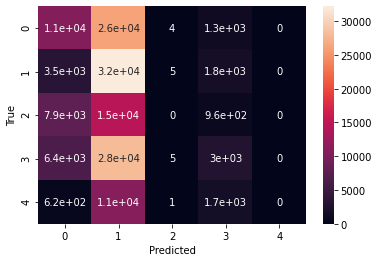

In [ ]:
y_test_pred = nbmodel.predict(X_test_tfidf)
show_perf_metrics(y_test2, y_test_pred)

# Logistic Regression

## For Hyperpartisan

### Training the model

In [ ]:
from sklearn.linear_model import LogisticRegression

lrmodel = LogisticRegression()

lrmodel.fit(X_tfidf_train, y_train)

Performance on Train and validation set

f1 score:  [92.73630173 92.81905748]
accuracy:  92.77791666666667
precision:  [93.25214387 92.31422155]
recall:  [92.22613516 93.32944534]


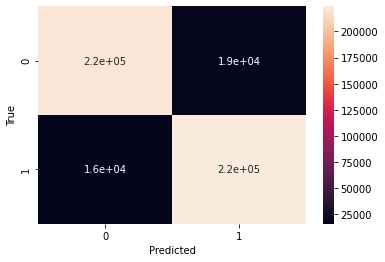

In [ ]:
y_pred = lrmodel.predict(X_tfidf_train)
show_perf_metrics(y_train, y_pred)

f1 score:  [91.22833396 91.26990065]
accuracy:  91.24916666666667
precision:  [91.53033859 90.97116341]
recall:  [90.92831571 91.57060639]


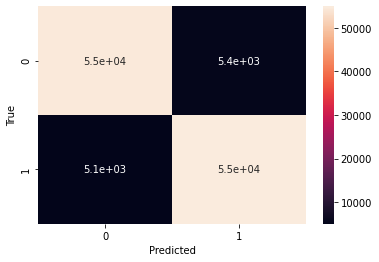

In [ ]:
y_pred = lrmodel.predict(X_tfidf_validate)
show_perf_metrics(y_validate, y_pred)

### Testing

(150000,) (150000,)
f1 score:  [46.36784093 66.34260138]
accuracy:  58.64066666666666
precision:  [65.9323909  55.92773839]
recall:  [35.75733333 81.524     ]


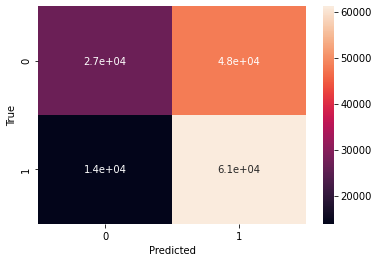

In [ ]:
y_test_pred = lrmodel.predict(X_test_tfidf)
print(y_test_pred.shape, y_test.shape)
show_perf_metrics(y_test, y_test_pred)

## For Bias

### Training

In [ ]:
lrmodel = LogisticRegression()

lrmodel.fit(X_tfidf_train2, y_train2)

Performance on Train and validation set

f1 score:  [93.3239056  85.86250065 80.60365976 89.03919293 79.05118123]
accuracy:  87.93833333333333
precision:  [92.51526959 82.72805747 82.30567977 90.35793491 88.03446189]
recall:  [94.14680214 89.24381625 78.97060656 87.75839038 71.73150001]


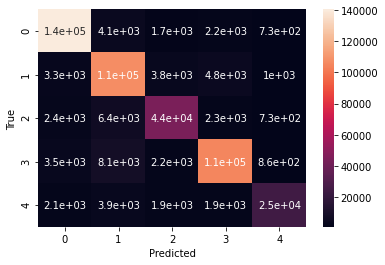

In [ ]:
y_pred = lrmodel.predict(X_tfidf_train2)
show_perf_metrics(y_train2, y_pred)

f1 score:  [91.22833396 91.26990065]
accuracy:  91.24916666666667
precision:  [91.53033859 90.97116341]
recall:  [90.92831571 91.57060639]


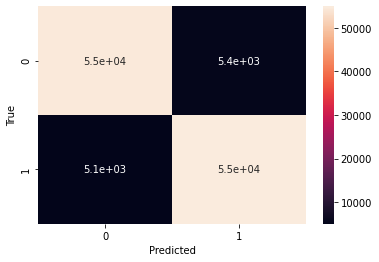

In [ ]:
y_pred = lrmodel.predict(X_tfidf_validate2)
show_perf_metrics(y_validate2, y_pred)

### Testing

(150000,) (150000,)
f1 score:  [25.1270648  39.59197595 19.56929093 46.55947332  8.10246899]
accuracy:  34.05866666666667
precision:  [38.75762195 28.17739441 26.98876404 57.26409218 17.37509321]
recall:  [18.58940882 66.552      15.34955055 39.22666667  5.28304739]


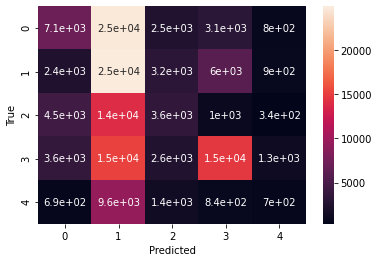

In [ ]:
y_test_pred = lrmodel.predict(X_test_tfidf)
print(y_test_pred.shape, y_test2.shape)
show_perf_metrics(y_test2, y_test_pred)

# Support Vector Classifier

## For Hyperpartisan

### Training

In [ ]:
from sklearn.svm import SVC

clf = SVC(gamma='auto')
clf.fit(X_tfidf_train, y_train)

Performance on Train and Validation set

In [ ]:
y_pred = lrmodel.predict(X_tfidf_train)
show_perf_metrics(y_train, y_pred)

In [ ]:
y_pred = lrmodel.predict(X_tfidf_validate)
show_perf_metrics(y_validate, y_pred)

### Testing

In [ ]:
y_test_pred = lrmodel.predict(X_test_tfidf)
print(y_test_pred.shape, y_test.shape)
show_perf_metrics(y_test, y_test_pred)